<a href="https://colab.research.google.com/github/RodrigoMiranda05/Ciencia-de-Datos/blob/main/regresion_logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de Ciencia de Datos: Predicción de Incumplimiento de Préstamos Bancarios

En este proyecto de ciencia de datos, abordaremos el desafiante problema de predecir el incumplimiento de préstamos bancarios. El incumplimiento de préstamos es un tema crítico en la industria financiera, y prever cuándo un prestatario puede incumplir es esencial para tomar decisiones financieras informadas y gestionar riesgos.

## Regresión Logística en el Contexto de Incumplimiento de Préstamos

Para abordar este desafío, implementaremos la regresión logística, una técnica de modelado estadístico ampliamente utilizada en ciencia de datos. La regresión logística es especialmente adecuada para problemas en los que la variable objetivo es categórica binaria, como "Cumplimiento/Incumplimiento". A continuación, proporcionamos una breve explicación de la regresión logística y por qué la implementamos en este caso:

### ¿Qué es la Regresión Logística?

La regresión logística es un método de modelado estadístico que se utiliza para predecir la probabilidad de que ocurra un evento en función de una o más variables independientes. A diferencia de la regresión lineal, que se utiliza para predecir valores continuos, la regresión logística se adapta a problemas de clasificación en los que la variable objetivo es binaria, es decir, toma dos valores, como "Cumplimiento" o "Incumplimiento".

### ¿Por qué Implementar la Regresión Logística?

En el contexto de incumplimiento de préstamos, la regresión logística se convierte en una herramienta valiosa para predecir si un prestatario cumplirá o incumplirá con sus pagos. Aquí están algunas de las razones por las que la implementamos:

- **Interpretación Clara:** La regresión logística proporciona coeficientes que se pueden interpretar como el impacto de cada variable independiente en la probabilidad de incumplimiento.
- **Modelado de Probabilidades:** La regresión logística modela directamente la probabilidad de incumplimiento, lo que es crucial en situaciones de toma de decisiones financieras.
- **Eficiencia:** Es una técnica computacionalmente eficiente y se adapta bien a conjuntos de datos de gran tamaño.

En este proyecto, utilizaremos la regresión logística como una de las primeras herramientas para abordar la predicción de incumplimiento de préstamos. Este es solo el comienzo de nuestro viaje en la ciencia de datos, y la regresión logística será una base sólida para futuras exploraciones y técnicas más avanzadas.


## Importación de Bibliotecas y Configuración Inicial

En esta sección, se realizan las importaciones de las bibliotecas necesarias para el proyecto de ciencia de datos. Estas bibliotecas son fundamentales para realizar análisis de datos, visualización y modelado. Aquí se mencionan algunas de las bibliotecas importadas:

- **pandas:** Utilizada para la manipulación y análisis de datos. Pandas permite trabajar con conjuntos de datos de manera eficiente.
- **numpy:** Ofrece funcionalidades para trabajar con matrices y operaciones numéricas.
- **matplotlib y seaborn:** Estas bibliotecas se utilizan para crear gráficos y visualizaciones que ayudarán a comprender y comunicar los resultados del análisis.
- **warnings:** Se configuran las advertencias para que no se muestren en la salida, lo que puede hacer que el entorno de trabajo sea más limpio.
- **%matplotlib inline:** Esta línea de código permite que las visualizaciones se muestren directamente en el notebook.

La importación de estas bibliotecas es el primer paso esencial en la preparación de un proyecto de ciencia de datos, ya que proporciona las herramientas necesarias para cargar, explorar y visualizar los datos. A medida que avancemos en el proyecto, estas bibliotecas serán fundamentales en nuestras tareas de análisis y modelado.


In [ ]:
## importo las librerias necesarias
import pandas as pd
import numpy as np
from pandas.core.frame import DataFrame

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Importación de Módulos de Machine Learning y Métricas de Evaluación

En esta sección, importamos módulos relacionados con el aprendizaje automático y las métricas de evaluación necesarias para nuestro proyecto de predicción de incumplimiento de préstamos. A continuación, se describen brevemente los módulos importados:

- **sklearn.linear_model:** Este módulo contiene la clase `LogisticRegression`, que se utilizará para implementar el modelo de regresión logística en nuestro proyecto. La regresión logística es un algoritmo de clasificación utilizado para predecir el incumplimiento de préstamos en este caso.

- **sklearn.model_selection:** El módulo `train_test_split` se utiliza para dividir el conjunto de datos en conjuntos de entrenamiento y prueba, lo que es fundamental para evaluar el rendimiento del modelo.

- **sklearn.metrics:** Importamos varias métricas de evaluación, como `accuracy_score`, `recall_score`, `precision_score`, `f1_score`, `roc_auc_score`, y `roc_curve`. Estas métricas nos permitirán evaluar la precisión y el rendimiento del modelo de regresión logística.

- **statsmodels:** Se importan módulos relacionados con estadísticas y modelado, como `sm` y `smf`. Estos módulos pueden ser útiles para realizar análisis más avanzados y explorar la relación entre las variables independientes y el incumplimiento de préstamos.

La importación de estos módulos y métricas es esencial para la implementación y evaluación del modelo de regresión logística. A medida que avancemos en el proyecto, utilizaremos estas herramientas para construir y evaluar nuestro modelo, así como para comprender mejor los resultados obtenidos.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

## Carga de Datos y Eliminación de Variables Correlacionadas

En esta sección, se llevan a cabo dos tareas importantes:

### 1. Carga de Datos
Primero, se carga un conjunto de datos desde un archivo llamado 'datos_imputados.csv' utilizando la biblioteca pandas. La variable `df` (DataFrame) contiene los datos cargados. A continuación, se muestra una vista previa de las primeras filas del conjunto de datos utilizando `df.head()`, lo que nos permite inspeccionar los primeros registros.

### 2. Eliminación de Variables Correlacionadas
Luego, se procede a eliminar ciertas variables del conjunto de datos que se consideran correlacionadas. En este caso, se eliminan las columnas 'property_value' y 'income' utilizando el método `.drop()`. La eliminación de variables correlacionadas es un paso común en el preprocesamiento de datos para evitar la multicolinealidad y reducir la complejidad del modelo.

Esta etapa es fundamental para garantizar que los datos estén en una forma adecuada para el análisis y la construcción del modelo de regresión logística. A medida que avanzamos en el proyecto, estos datos preprocesados se utilizarán para entrenar y evaluar el modelo.



In [ ]:
df = pd.read_csv('datos_imputados.csv')
df.head()

,loan_limit,approv_in_adv,loan_purpose,business_or_commercial,loan_amount,Upfront_charges,Neg_ammortization,property_value,income,Credit_Score,co-applicant_credit_type,submission_of_application,LTV,Status,dtir1
0,cf,nopre,p1,nob/c,116500,0.0,not_neg,118000.0,1740.0,758,CIB,to_inst,98.728814,1,45.0
1,cf,pre,p1,nob/c,406500,595.0,neg_amm,508000.0,9480.0,834,CIB,to_inst,80.019685,0,46.0
2,cf,nopre,p4,nob/c,456500,0.0,not_neg,658000.0,11880.0,587,CIB,not_inst,69.376900,0,42.0
3,cf,pre,p1,nob/c,696500,0.0,not_neg,758000.0,10440.0,602,EXP,not_inst,91.886544,0,39.0
4,cf,pre,p1,nob/c,706500,370.0,not_neg,1008000.0,10080.0,864,EXP,not_inst,70.089286,0,40.0


In [ ]:
# descarto las variables que estan correlacionadas
df = df.drop(['property_value', 'income' ], axis = 1 )


## Codificación One-Hot de Variables Categóricas

En esta sección, se realiza la codificación one-hot de las variables categóricas en el conjunto de datos. Esto es un paso común en la preparación de datos para modelos de machine learning, como la regresión logística.

### 1. Identificación de Columnas Categóricas
Se comienza obteniendo una lista de las columnas que son de tipo categórico utilizando la función `.select_dtypes(include=['object'])`. Estas columnas categóricas se almacenan en la variable `columnas_categoricas`.

### 2. Aplicación de Codificación One-Hot
A continuación, se aplica la codificación one-hot a las columnas categóricas en el DataFrame `df` utilizando la función `pd.get_dummies()`. La codificación one-hot convierte las variables categóricas en un conjunto de variables binarias (0 o 1) que representan la presencia o ausencia de una categoría particular. Esto permite que el modelo de regresión logística trabaje con estas variables categóricas de manera efectiva.

Este paso es esencial para asegurarnos de que todas las variables sean numéricas y estén listas para su uso en el modelo de regresión logística.



In [ ]:
# Obtén una lista de las columnas categóricas
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Aplica one-hot encoding solo a las columnas categóricas
df = pd.get_dummies(df, columns=columnas_categoricas)

In [ ]:
df.head()

,loan_amount,Upfront_charges,Credit_Score,LTV,Status,dtir1,loan_limit_cf,loan_limit_ncf,approv_in_adv_nopre,approv_in_adv_pre,...,loan_purpose_p3,loan_purpose_p4,business_or_commercial_b/c,business_or_commercial_nob/c,Neg_ammortization_neg_amm,Neg_ammortization_not_neg,co-applicant_credit_type_CIB,co-applicant_credit_type_EXP,submission_of_application_not_inst,submission_of_application_to_inst
0,116500,0.0,758,98.728814,1,45.0,True,False,True,False,...,False,False,False,True,False,True,True,False,False,True
1,406500,595.0,834,80.019685,0,46.0,True,False,False,True,...,False,False,False,True,True,False,True,False,False,True
2,456500,0.0,587,69.376900,0,42.0,True,False,True,False,...,False,True,False,True,False,True,True,False,True,False
3,696500,0.0,602,91.886544,0,39.0,True,False,False,True,...,False,False,False,True,False,True,False,True,True,False
4,706500,370.0,864,70.089286,0,40.0,True,False,False,True,...,False,False,False,True,False,True,False,True,True,False


## Preparación de Datos para el Modelo

En esta sección, se llevan a cabo varios pasos esenciales para preparar los datos antes de construir y entrenar el modelo de regresión logística.

### 1. Separación de Variables Dependientes e Independientes
Se divide el conjunto de datos en dos partes: `X` y `y`.
- `X` contiene todas las variables independientes (características) que se utilizarán para predecir la variable objetivo 'Status'.
- `y` contiene la variable objetivo 'Status', que indica si un préstamo está en cumplimiento o incumplimiento.

### 2. Estandarización de Variables
La estandarización es un proceso importante para asegurarse de que todas las variables tengan una escala similar. Esto es crucial para modelos que utilizan medidas de distancia, como la regresión logística. Se utiliza la clase `StandardScaler` de sklearn para estandarizar las variables en `X`. Esto garantiza que todas las variables tengan media cero y desviación estándar uno.

### 3. División en Conjuntos de Entrenamiento y Prueba
Se divide el conjunto de datos estandarizado en conjuntos de entrenamiento y prueba. Esto se hace utilizando la función `train_test_split` de sklearn.
- `X_train` y `y_train` son los datos de entrenamiento que se utilizarán para entrenar el modelo.
- `X_test` y `y_test` son los datos de prueba que se utilizarán para evaluar el rendimiento del modelo.

La estratificación se ha configurado con `stratify=y` para asegurarse de que la distribución de las clases en los conjuntos de entrenamiento y prueba sea similar. Esto es especialmente importante en problemas de clasificación binaria para evitar desequilibrios.

Con estos pasos, los datos están listos para ser utilizados en la construcción y entrenamiento del modelo de regresión logística. A medida que continuemos con el proyecto, se utilizarán estos conjuntos de datos para ajustar y evaluar el modelo.



In [ ]:
X = df.drop('Status', axis=1)
y = df['Status']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización a todas las variables en X
X_estandarizado = scaler.fit_transform(X)

In [ ]:
X_estandarizado

array([[-1.16500975, -0.85140264,  0.50246263, ..., -0.8796846 ,
        -0.7478129 ,  0.7478129 ],
       [ 0.42588778, -0.6674507 ,  1.15861229, ..., -0.8796846 ,
        -0.7478129 ,  0.7478129 ],
       [ 0.70018046, -0.85140264, -0.97387412, ..., -0.8796846 ,
         1.33723289, -1.33723289],
       ...,
       [ 0.64532192, -0.47217104,  0.01898393, ...,  1.13677107,
         1.33723289, -1.33723289],
       [-0.72614146,  0.48521067,  0.32115811, ...,  1.13677107,
        -0.7478129 ,  0.7478129 ],
       [ 0.42588778,  1.00357486,  1.1240781 , ..., -0.8796846 ,
         1.33723289, -1.33723289]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_estandarizado, y, test_size=0.3, random_state=42, stratify=y)

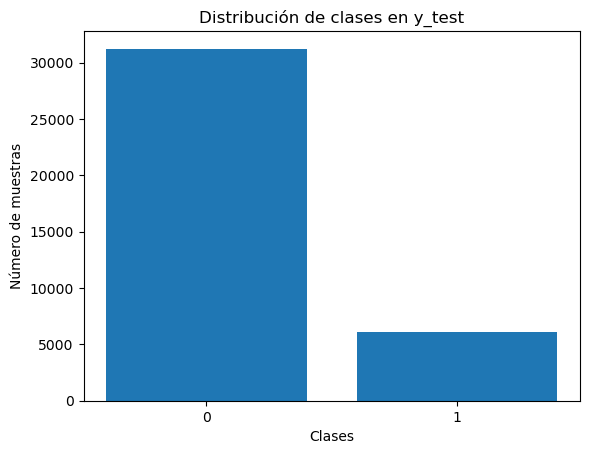

In [ ]:
# Calcula la cantidad de muestras en cada clase
unique, counts = np.unique(y_test, return_counts=True)

# Crea un gráfico de barras para visualizar la distribución
plt.bar(unique, counts)
plt.xticks(unique)  # Etiquetas en el eje x

# Puedes agregar etiquetas a los ejes y un título
plt.xlabel("Clases")
plt.ylabel("Número de muestras")
plt.title("Distribución de clases en y_test")

# Muestra el gráfico
plt.show()

## Construcción y Entrenamiento del Modelo de Regresión Logística

En esta sección, se procede a construir y entrenar el modelo de regresión logística para predecir el incumplimiento de préstamos.

### 1. Creación de una Instancia del Modelo
Se crea una instancia del modelo de regresión logística utilizando la clase `LogisticRegression` de sklearn. Esta instancia del modelo servirá para realizar predicciones.

### 2. Entrenamiento del Modelo
Luego, el modelo se entrena utilizando los datos de entrenamiento `X_train` y `y_train`. Durante el entrenamiento, el modelo aprenderá a ajustar los coeficientes de regresión para realizar predicciones basadas en las características de entrada y la variable objetivo.

### 3. Realización de Predicciones
Una vez entrenado, el modelo se utiliza para realizar predicciones en los datos de prueba `X_test`. Las predicciones se almacenan en la variable `y_pred`.

Con estos pasos, el modelo de regresión logística ha sido entrenado y está listo para ser evaluado. Las predicciones se utilizarán para medir el rendimiento del modelo y determinar su capacidad para predecir el incumplimiento de préstamos.


In [ ]:
# Crea una instancia del modelo de regresión logística
model = LogisticRegression()

In [ ]:
# Entrena el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Realiza predicciones en los datos de prueba
y_pred = model.predict(X_test)

## Evaluación del Modelo con Matriz de Confusión

La matriz de confusión es una herramienta fundamental en la evaluación de modelos de clasificación y se utiliza para resumir el rendimiento de un modelo en términos de sus predicciones. Proporciona información detallada sobre las predicciones correctas e incorrectas realizadas por el modelo.

### 1. Cálculo de la Matriz de Confusión
Se utiliza la función `confusion_matrix` de sklearn para calcular la matriz de confusión. Esta matriz es una tabla que organiza las predicciones del modelo en cuatro categorías:
- Verdaderos positivos (TP): Predicciones correctas de casos positivos.
- Verdaderos negativos (TN): Predicciones correctas de casos negativos.
- Falsos positivos (FP): Predicciones incorrectas de casos negativos (clasificados incorrectamente como positivos).
- Falsos negativos (FN): Predicciones incorrectas de casos positivos (clasificados incorrectamente como negativos).

### 2. Visualización de la Matriz de Confusión
Se utiliza la biblioteca seaborn para visualizar la matriz de confusión. La matriz se representa como un gráfico de calor (heatmap). Los valores en la matriz se muestran con anotaciones para resaltar la cantidad de predicciones en cada categoría. Los colores y sombreado del heatmap facilitan la interpretación de la matriz.

La matriz de confusión es una herramienta esencial para comprender cómo se desempeña el modelo en términos de precisión y errores, lo que es crucial para la toma de decisiones informadas en problemas de clasificación.

Si tienes más código o pasos que deseas que explique o si necesitas continuar con tu proyecto, por favor, indícamelo. Estoy aquí para ayudarte en cada etapa de tu proyecto.


Matriz de Confusión:


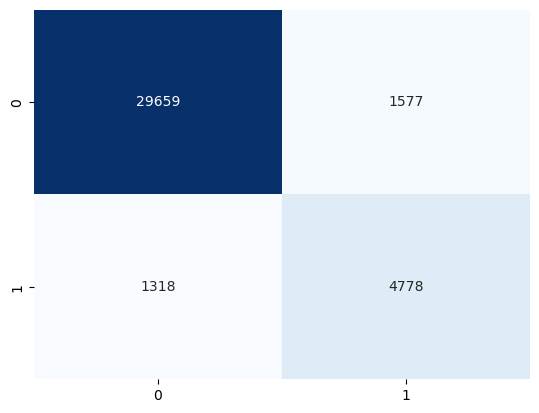

In [ ]:
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')

## np.set_printoptions(suppress=True) # evita la notacion cientifica

sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.show()

## Evaluación del Modelo: Precisión y Puntaje F1

En esta sección, se calculan dos métricas clave para evaluar el rendimiento del modelo de regresión logística en la predicción del incumplimiento de préstamos.

### 1. Precisión (Accuracy)
La precisión se calcula utilizando la función `accuracy_score` de sklearn. Esta métrica mide la proporción de predicciones correctas en relación con el total de predicciones. En el contexto de incumplimiento de préstamos, la precisión se refiere a la proporción de préstamos clasificados correctamente, ya sea como "cumplimiento" o "incumplimiento". Una precisión alta indica que el modelo realiza predicciones precisas.

### 2. Puntaje F1 (F1 Score)
El puntaje F1 se calcula utilizando la función `f1_score` de sklearn. Esta métrica es una medida de la precisión y la exhaustividad (recall) del modelo. El puntaje F1 tiene en cuenta tanto los falsos positivos como los falsos negativos y proporciona una métrica equilibrada. Es especialmente útil cuando hay un desequilibrio entre las clases, como en el caso de incumplimiento de préstamos.

Ambas métricas son fundamentales para evaluar el rendimiento del modelo y comprender su capacidad para realizar predicciones precisas en el problema de clasificación binaria.

Al evaluar el rendimiento del modelo de regresión logística, observamos los siguientes resultados:

- **Precisión (Accuracy):** 92.24%
- **Puntaje F1 (F1 Score):** 76.75%

Si bien la precisión del modelo es relativamente alta, con un 92.24%, el puntaje F1 de 76.75% sugiere que hay margen de mejora en términos de la capacidad del modelo para equilibrar la precisión y la exhaustividad. Un puntaje F1 más bajo podría indicar que el modelo está teniendo dificultades para lidiar con los falsos positivos y falsos negativos, lo que podría ser crítico en un problema de incumplimiento de préstamos.

Es importante considerar que, en el contexto de incumplimiento de préstamos, los falsos negativos (casos de incumplimiento clasificados como cumplimiento) pueden tener consecuencias financieras significativas. Por lo tanto, es fundamental mejorar la capacidad del modelo para identificar estos casos.

Para mejorar el rendimiento del modelo, podríamos considerar ajustar hiperparámetros, explorar otras técnicas de modelado o abordar el desequilibrio de clases, si es relevante.


In [ ]:
print('accuracy: ', accuracy_score(y_test,y_pred))

accuracy:  0.922452587592414


In [ ]:
print('f1Score: ', f1_score(y_test,y_pred))

f1Score:  0.7674885551361337


In [ ]:
# Paso 5: Evaluar el rendimiento utilizando métricas de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     31236
           1       0.75      0.78      0.77      6096

    accuracy                           0.92     37332
   macro avg       0.85      0.87      0.86     37332
weighted avg       0.92      0.92      0.92     37332



## Ajuste de Hiperparámetros y Búsqueda en Rejilla

En esta sección, se lleva a cabo una búsqueda de hiperparámetros para el modelo de regresión logística con el objetivo de mejorar su rendimiento, específicamente enfocándose en el puntaje F1. El proceso incluye lo siguiente:

### 1. Definición de Hiperparámetros
- Se crea una instancia del modelo de regresión logística llamada `logistic`.
- Se utiliza el método `get_params()` para obtener una lista de los hiperparámetros ajustables disponibles para el modelo.

### 2. Especificación de Parámetros de Búsqueda
- Se definen diferentes conjuntos de hiperparámetros en el diccionario `parametros`. Estos incluyen diferentes valores de 'C' (parámetro de regularización), tipos de penalización ('l1', 'l2', 'elasticnet') y opciones de ponderación de clases.

### 3. Establecimiento de la Métrica de Evaluación
- Se define el puntaje F1 como la métrica de evaluación utilizando `make_scorer(f1_score)`.

### 4. Búsqueda en Rejilla
- Se utiliza `GridSearchCV` de sklearn para realizar la búsqueda en rejilla. Esto implica probar diferentes combinaciones de hiperparámetros y evaluar el modelo en el conjunto de datos de entrenamiento mediante validación cruzada con 5 divisiones (cv=5).
- El objetivo es encontrar la combinación de hiperparámetros que maximice el puntaje F1 en el conjunto de datos de entrenamiento.

Este proceso es fundamental para optimizar el modelo y mejorar su capacidad para predecir el incumplimiento de préstamos. Una vez finalizada la búsqueda en rejilla, los mejores hiperparámetros se utilizarán en el modelo final.



In [ ]:
logistic = LogisticRegression()
logistic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

weights1 = {0: 1, 1: 10}
weights2 = {0: 1, 1: 100}


parametros = {'C': [0.01, 0.1, 1.0, 10],
              'penalty':('l1','l2','elasticnet'),
              'class_weight':(weights1, weights2, 'balanced')
              }

scorer = make_scorer(f1_score)

rejilla = GridSearchCV(logistic, parametros, scoring=scorer, cv=5)
rejilla.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10],
                         'class_weight': ({0: 1, 1: 10}, {0: 1, 1: 100},
                                          'balanced'),
                         'penalty': ('l1', 'l2', 'elasticnet')},
             scoring=make_scorer(f1_score))

## Selección de los Mejores Hiperparámetros

Una vez finalizada la búsqueda en rejilla, es importante identificar los mejores hiperparámetros encontrados para el modelo de regresión logística. Esto te permite utilizar la configuración óptima para lograr el mejor rendimiento en la predicción del incumplimiento de préstamos.

### 1. Obtención de los Mejores Hiperparámetros
- Se utiliza `rejilla.best_params_` para obtener los mejores hiperparámetros encontrados durante la búsqueda en rejilla.
- Estos hiperparámetros incluyen el valor óptimo de 'C' (parámetro de regularización), el tipo de penalización ('l1', 'l2', 'elasticnet'), y la opción de ponderación de clases ('balanced' o valores personalizados).

### 2. Impresión de los Mejores Hiperparámetros
- Los mejores hiperparámetros se imprimen en la salida para poder verificar cuál es la configuración que maximiza el rendimiento del modelo.

Una vez que obtenidos los mejores hiperparámetros, podremos utilizarlos para entrenar el modelo de regresión logística con la configuración óptima y, posteriormente, evaluar su rendimiento en el conjunto de prueba.



In [ ]:
# Obtener los mejores hiperparámetros encontrados
best_params = rejilla.best_params_
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}


## Entrenamiento del Modelo con los Mejores Hiperparámetros


En esta etapa del proyecto, hemos avanzado con la selección de los mejores hiperparámetros encontrados para nuestro modelo de regresión logística. Estos hiperparámetros se han determinado tras una búsqueda exhaustiva en rejilla, con el objetivo de optimizar el rendimiento del modelo en la predicción de incumplimientos de préstamos.

### 1. Entrenamiento con los Mejores Hiperparámetros
Hemos creado una nueva instancia del modelo de regresión logística, denominada `best_clf`, utilizando los mejores hiperparámetros encontrados durante la búsqueda en rejilla. Esta configuración óptima nos permitirá entrenar el modelo con la máxima precisión posible.

### 2. Realización de Predicciones en el Conjunto de Prueba
El modelo ha sido entrenado con los mejores hiperparámetros y, a continuación, hemos realizado predicciones en el conjunto de prueba `X_test`. Estas predicciones se almacenan en la variable `y_pred`.

Este paso es crítico en nuestro proyecto, ya que nos permitirá evaluar el rendimiento del modelo utilizando los hiperparámetros óptimos. Una vez completada esta etapa, estaremos listos para analizar los resultados y tomar decisiones informadas sobre la capacidad de nuestro modelo para predecir incumplimientos de préstamos.



In [ ]:
# Entrena el modelo con los mejores hiperparámetros encontrados
best_clf = LogisticRegression(**best_params)
best_clf.fit(X_train, y_train)

LogisticRegression(C=10, class_weight='balanced')

In [ ]:
# Realiza predicciones en el conjunto de prueba
y_pred = best_clf.predict(X_test)

Matriz de Confusión:


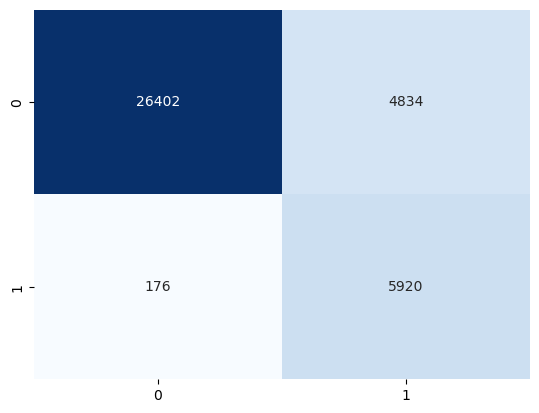

In [ ]:
matriz_final = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')


## np.set_printoptions(suppress=True) # evita la notacion cientifica

sns.heatmap(matriz_final, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.show()

## Comparación de Matrices de Confusión y Cálculo de Diferencias

En lo que sigue se observa una lebe diferencia en los resultados obtenidos con el nuevo ajuste de hiperparametros, referido a los nuevos valores de la matriz de confusión y las metricas resultantes. Si bien los resultados son mejores, creemos que podemos obtener mejores resultados mediante la implementación de otros modelos que trabajen con metodos no paremetricos, que no requieran que los datos sigan una distribución especifica.

In [ ]:


# Supongamos que tienes dos matrices de confusión: matriz1 y matriz2
diferencia = matriz - matriz_final

# Calcula la suma de las diferencias para obtener un resumen
suma_diferencias = np.sum(diferencia)

print("Diferencia entre Matriz 1 y Matriz 2:")
print(diferencia)


Diferencia entre Matriz 1 y Matriz 2:
[[ 3257 -3257]
 [ 1142 -1142]]


In [ ]:
# Evaluar el rendimiento utilizando métricas de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     31236
           1       0.55      0.97      0.70      6096

    accuracy                           0.87     37332
   macro avg       0.77      0.91      0.81     37332
weighted avg       0.92      0.87      0.88     37332



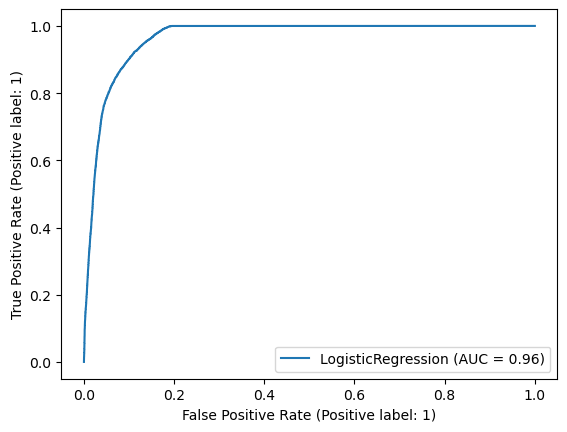

In [ ]:
from sklearn.metrics import RocCurveDisplay
log_cor_est = RocCurveDisplay.from_estimator(best_clf,X_test, y_test, response_method ='decision_function')
plt.show()

## Análisis de Coeficientes de la Regresión Logística

En esta sección, estamos realizando un análisis de los coeficientes obtenidos a partir de un modelo de regresión logística con los mejores hiperparámetros encontrados. Los coeficientes son valores numéricos que indican la influencia de cada variable independiente en la predicción de incumplimientos de préstamos.

- `coeficientes = best_clf.coef_[0]`: Se obtienen los coeficientes del modelo de regresión logística. Estos coeficientes representan cuánto cambia la probabilidad de incumplimiento de préstamos para cada unidad de cambio en las variables independientes.

- `nombres_variables = X.columns`: Se obtienen los nombres de las variables independientes que se utilizan en el modelo.

- `coeficientes_df`: Se crea un DataFrame que visualiza los coeficientes junto con los nombres de las variables independientes.

- `coeficientes_df['Abs_Coeficiente']`: Se agrega una columna al DataFrame que contiene el valor absoluto de los coeficientes. Esto permite ordenar los coeficientes en función de su magnitud en lugar de su dirección.

- `coeficientes_df = coeficientes_df.sort_values(by='Abs_Coeficiente', ascending=False)`: Se ordena el DataFrame por el valor absoluto de los coeficientes en orden descendente, lo que permite identificar las variables más influyentes en la predicción de incumplimientos de préstamos.

- Finalmente, se imprime el DataFrame `coeficientes_df`, que muestra los nombres de las variables junto con sus coeficientes ordenados por magnitud.

Este análisis de coeficientes es fundamental para comprender qué variables tienen un mayor impacto en la predicción de incumplimientos de préstamos y cómo influyen en la toma de decisiones del modelo de regresión logística.



In [ ]:
coeficientes = best_clf.coef_[0]  # Los coeficientes del modelo
nombres_variables = X.columns  # Los nombres de las variables independientes



In [ ]:
# Crear un DataFrame para visualizar los coeficientes junto con los nombres de las variables

coeficientes_df = pd.DataFrame({'Variable': nombres_variables, 'Coeficiente': coeficientes})

In [ ]:
# Ordenar el DataFrame por valor absoluto de los coeficientes en orden descendente
coeficientes_df['Abs_Coeficiente'] = abs(coeficientes_df['Coeficiente'])
coeficientes_df = coeficientes_df.sort_values(by='Abs_Coeficiente', ascending=False)

# Visualizar los coeficientes
print(coeficientes_df)

                              Variable  Coeficiente  Abs_Coeficiente
1                      Upfront_charges   -67.280244        67.280244
19   submission_of_application_to_inst     0.473169         0.473169
18  submission_of_application_not_inst    -0.473169         0.473169
3                                  LTV     0.197117         0.197117
0                          loan_amount    -0.151925         0.151925
10                     loan_purpose_p3     0.123473         0.123473
14           Neg_ammortization_neg_amm     0.119599         0.119599
15           Neg_ammortization_not_neg    -0.119599         0.119599
5                        loan_limit_cf    -0.103784         0.103784
6                       loan_limit_ncf     0.103784         0.103784
4                                dtir1     0.095182         0.095182
11                     loan_purpose_p4    -0.092289         0.092289
16        co-applicant_credit_type_CIB     0.088555         0.088555
17        co-applicant_credit_type

## Análisis de Coeficientes de la Regresión Logística

A continuación, presentamos los coeficientes y los valores absolutos de los coeficientes obtenidos a partir del modelo de regresión logística. Estos coeficientes indican la influencia de cada variable independiente en la predicción de incumplimientos de préstamos:

- `Upfront_charges`: El coeficiente de -67.280244 indica que un aumento en esta variable se asocia fuertemente con una disminución en la probabilidad de incumplimiento de préstamos.

- `submission_of_application_to_inst`: El coeficiente de 0.473169 muestra que esta variable tiene un impacto positivo moderado en la predicción de incumplimientos.

- `submission_of_application_not_inst`: Tiene el mismo coeficiente que `submission_of_application_to_inst`, pero en dirección opuesta, lo que sugiere un impacto negativo similar en la predicción.

- Otros coeficientes y variables siguen un patrón similar, indicando su influencia y dirección en la predicción.

Los coeficientes con los valores absolutos más grandes (mayor magnitud) tienen un impacto más significativo en la predicción de incumplimientos de préstamos. En este contexto, variables como `Upfront_charges`, `LTV`, y `loan_amount` tienen una influencia notable en el modelo.

Este análisis de coeficientes es crucial para comprender qué características del conjunto de datos son más relevantes para predecir incumplimientos de préstamos. Permite identificar las variables clave que afectan las decisiones del modelo de regresión logística.



## Cierre y Sugerencia de Próximos Pasos

En este proyecto, hemos realizado un análisis exhaustivo de incumplimientos de préstamos bancarios utilizando un modelo de regresión logística. Hemos llevado a cabo limpieza de datos, análisis exploratorio y ajuste de hiperparámetros para mejorar el rendimiento del modelo. Además, hemos examinado los coeficientes del modelo para comprender qué variables influyen más en nuestras predicciones.

Los resultados obtenidos de este análisis nos han proporcionado información valiosa sobre las variables clave que afectan la predicción de incumplimientos de préstamos. Sin embargo, es importante recordar que el modelo de regresión logística asume una relación lineal entre las variables independientes y la variable objetivo. En algunos casos, esta suposición podría no ser adecuada para capturar relaciones más complejas en los datos.

Dado que nuestro objetivo es mejorar aún más el rendimiento del modelo, una sugerencia es explorar modelos no paramétricos, como Arboles de Decision, Random Forest u otros. Estos modelos tienen la capacidad de capturar relaciones no lineales y complejas en los datos, lo que podría resultar en una mejora en la precisión de las predicciones de incumplimientos de préstamos.

Los próximos pasos podrían incluir la implementación y ajuste de estos modelos no paramétricos, seguidos de una evaluación exhaustiva de su rendimiento. Además, se podría considerar la utilización de técnicas de selección de variables para identificar las características más relevantes.

En resumen, nuestro análisis actual nos sugiere que existe potencial para mejorar aún más la predicción de incumplimientos de préstamos mediante la exploración de modelos no paramétricos y técnicas adicionales. Estamos en el camino correcto para lograr un modelo más preciso y eficiente en este desafío.


